In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 3 is left side of brain, 6 is right side of brain

sampling_rate = 250
data_right = np.genfromtxt('right1.csv', delimiter=' ')
channel_3_right = []
channel_6_right = []

for i in range(1, len(data_right)):
    channel_3_right.append([data_right[i][1]])
    channel_6_right.append([data_right[i][2]])

t_right = np.array(range(len(data_right) - 1)) / sampling_rate 

In [3]:
sampling_rate = 250
data_left = np.genfromtxt('left1.csv', delimiter=' ')
channel_3_left = []
channel_6_left = []

for i in range(1, len(data_left)):
    channel_3_left.append([data_left[i][1]])
    channel_6_left.append([data_left[i][2]])

t_left = np.array(range(len(data_left) - 1)) / sampling_rate 

In [4]:
len(t_right)

7318

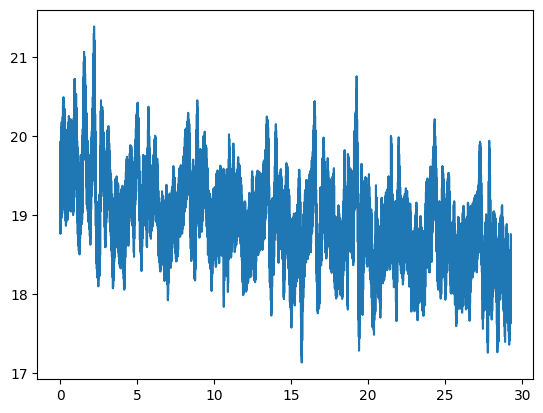

In [5]:
plt.plot(t_right, channel_3_right)

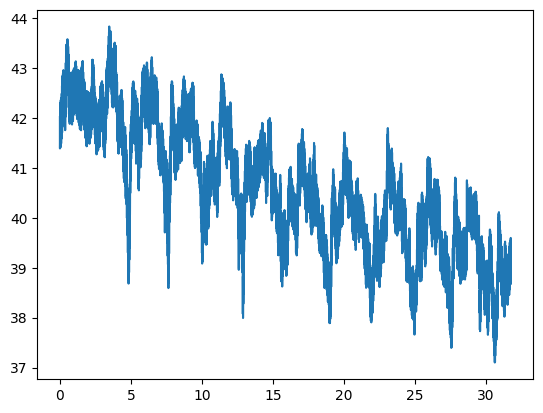

In [6]:
plt.plot(t_left, channel_3_left)

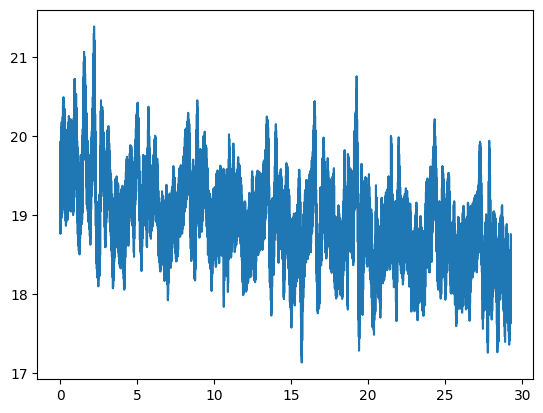

In [7]:
plt.plot(t_right, channel_3_right)

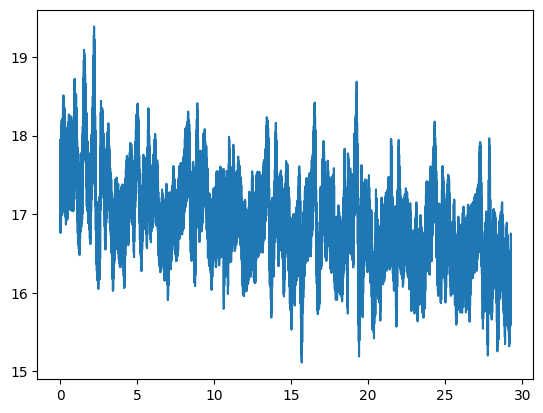

In [8]:
plt.plot(t_right, channel_6_right)